# PREPARING THE DATASETS

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


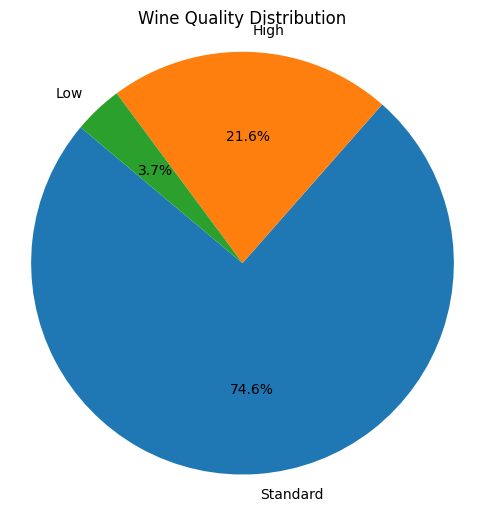

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_file_path = 'winequality-white.csv'
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
wine_df = pd.read_csv("winequality-white.csv", sep=';', quotechar='"')

# print(f"Dataset shape: {wine_df.shape}")

# convert to category labels
def categorize_quality(value):
    if value <= 4:
        return "Low"
    elif value <= 6:
        return "Standard"
    else:
        return "High"

wine_df["quality_label"] = wine_df["quality"].apply(categorize_quality)

label_map = {"Low": 0, "Standard": 1, "High": 2}
wine_df["quality"] = wine_df["quality_label"].map(label_map)

label_counts = wine_df['quality_label'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, )
plt.title('Wine Quality Distribution')
plt.axis('equal') 
plt.show()



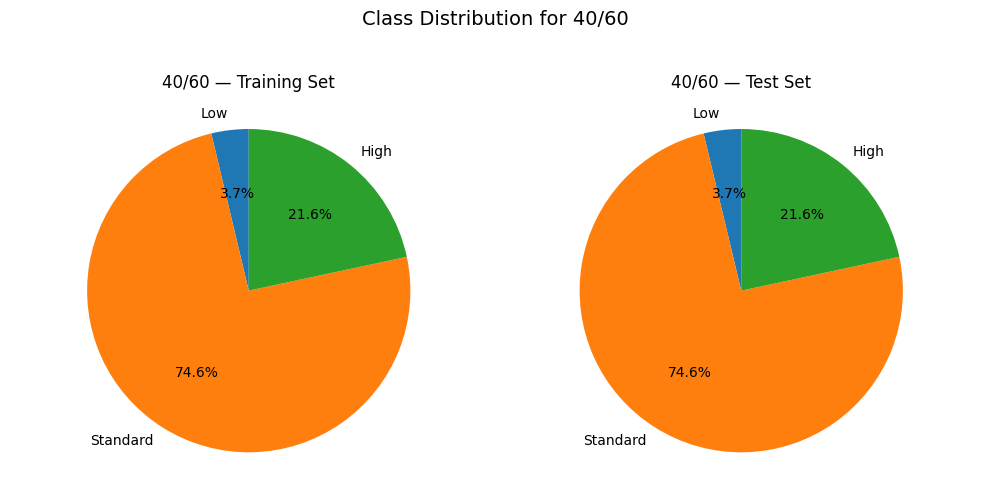

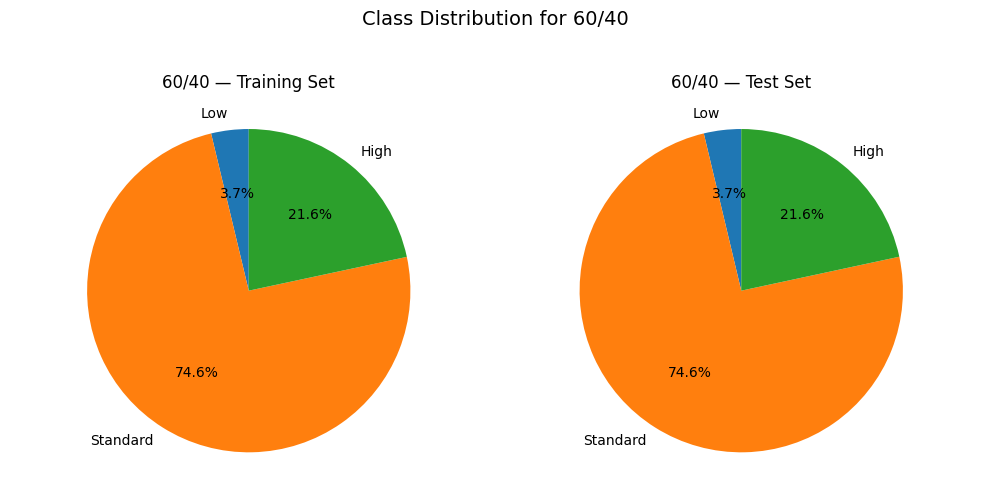

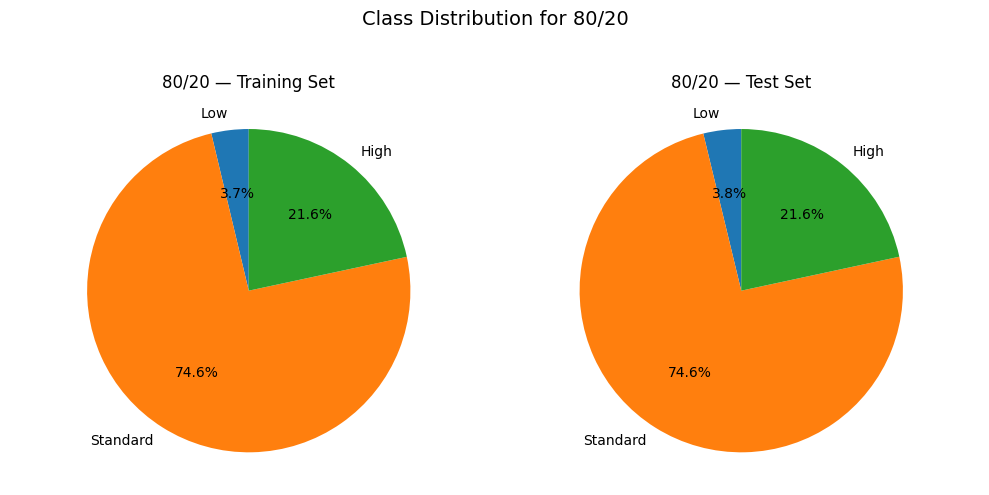

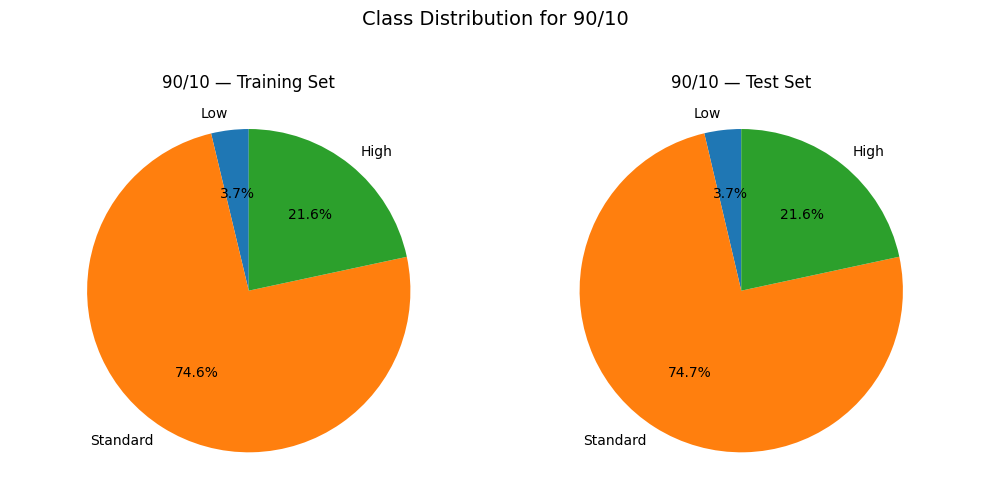

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn

X = wine_df.drop(columns=['quality', 'quality_label'])
y = wine_df['quality_label'].map(label_map)

ratios = {
    "40/60": (0.4, 0.6),
    "60/40": (0.6, 0.4),
    "80/20": (0.8, 0.2),
    "90/10": (0.9, 0.1),
}
splits = {}

for name, (train_size, test_size) in ratios.items():
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        X, y,
        train_size=train_size,
        test_size=test_size,
        stratify=y,
        shuffle=True,
        random_state=42
    )
    splits[name] = {
        "X_train": X_train,
        "y_train": y_train,
        "X_test":  X_test,
        "y_test":  y_test
    }


# Each split: training & test pies
for name, subset in splits.items():
    ct_train = np.bincount(subset["y_train"])
    ct_test  = np.bincount(subset["y_test"])
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].pie(
        ct_train,
        labels=label_map.keys(),
        autopct='%1.1f%%',
        startangle=90
    )
    axes[0].set_title(f"{name} — Training Set")
    axes[0].axis('equal')    
    
    axes[1].pie(
        ct_test,
        labels=label_map.keys(),
        autopct='%1.1f%%',
        startangle=90
    )
    axes[1].set_title(f"{name} — Test Set")
    axes[1].axis('equal')
    
    fig.suptitle(f"Class Distribution for {name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



# BUILDING THE DESICION TREE CLASSIFIERS

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Decision Tree for 40/60 Split


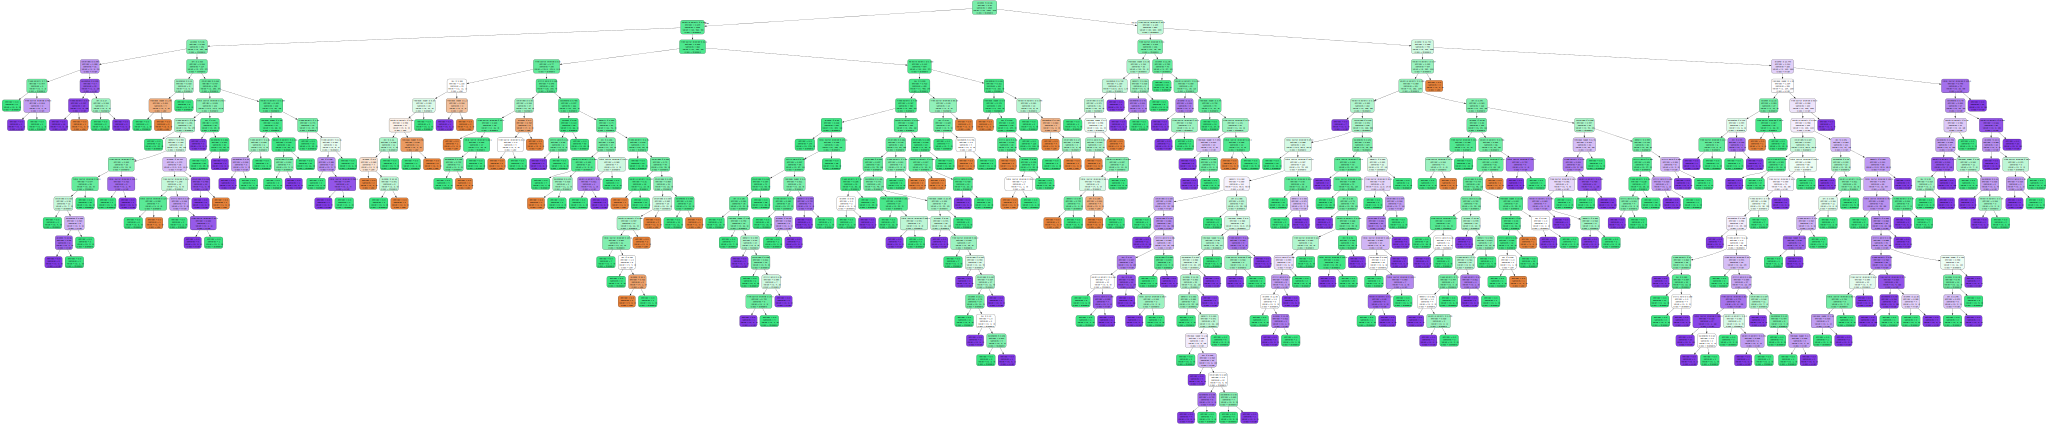

Decision Tree for 60/40 Split


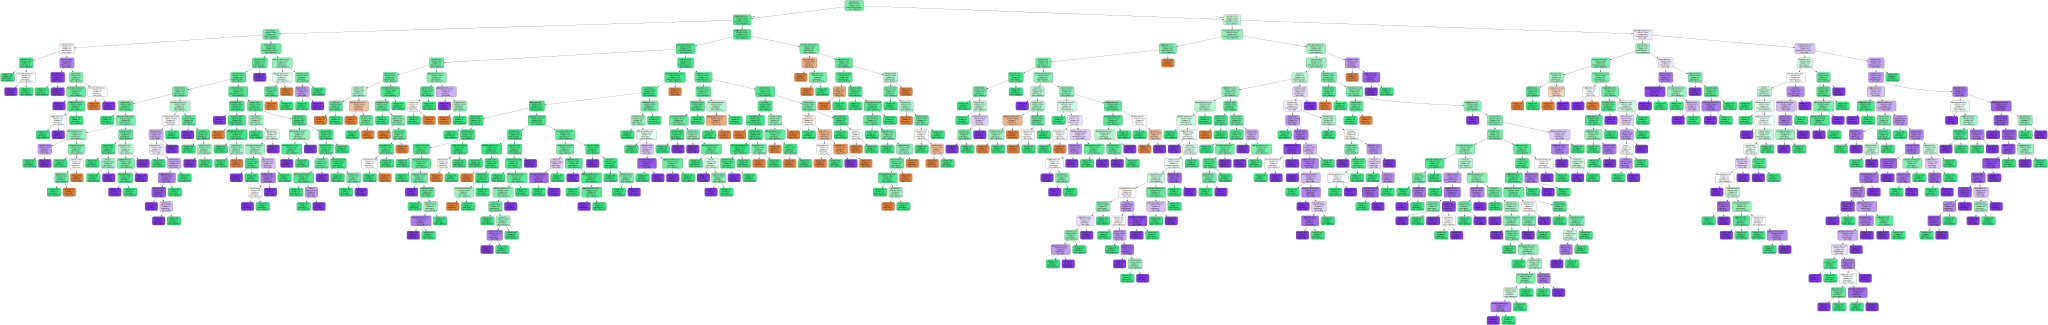

Decision Tree for 80/20 Split


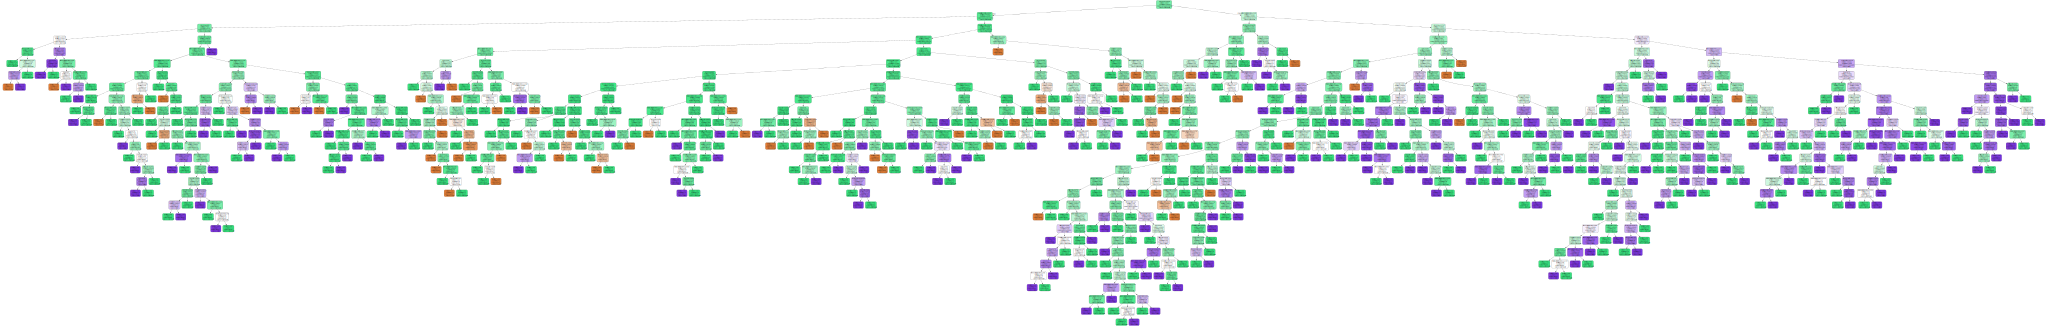

Decision Tree for 90/10 Split


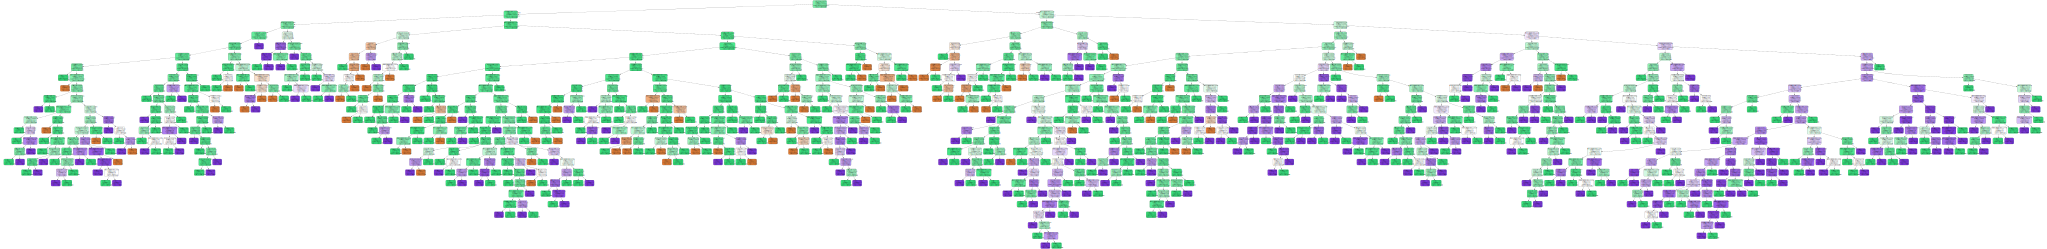

In [ ]:
%pip install pydotplus
%pip install graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

feature_names = X.columns.tolist() 

for name, subset in splits.items():
    X_train, y_train = subset["X_train"], subset["y_train"]

    # fit
    clf = DecisionTreeClassifier(
        criterion="entropy",  
        random_state=42
    )
    clf.fit(X_train, y_train)

    dot_data = export_graphviz(
        clf,
        out_file=None,            
        feature_names=feature_names,
        class_names=list(label_map.keys()),
        filled=True,             
        rounded=True,             
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    print(f"Decision Tree for {name} Split")
    display(graph) 
        
    ## Optional: Save to file (e.g., PNG)
    # graph.render(filename=f"tree_{title}", format='png', cleanup=True)
 


# CLASSIFICATION REPORT AND CONFUSION TREE


=== 40/60 Split ===
Classification Report:
              precision    recall  f1-score   support

         Low     0.2553    0.2182    0.2353       110
    Standard     0.8449    0.8372    0.8410      2193
        High     0.5536    0.5849    0.5688       636

    accuracy                         0.7594      2939
   macro avg     0.5513    0.5468    0.5484      2939
weighted avg     0.7598    0.7594    0.7595      2939

Confusion Matrix:
[[  24   75   11]
 [  68 1836  289]
 [   2  262  372]]


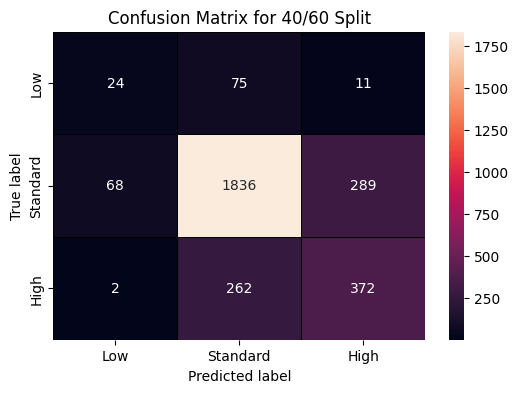


=== 60/40 Split ===
Classification Report:
              precision    recall  f1-score   support

         Low     0.2500    0.2740    0.2614        73
    Standard     0.8508    0.8421    0.8464      1463
        High     0.5810    0.5920    0.5864       424

    accuracy                         0.7668      1960
   macro avg     0.5606    0.5694    0.5648      1960
weighted avg     0.7701    0.7668    0.7684      1960

Confusion Matrix:
[[  20   46    7]
 [  57 1232  174]
 [   3  170  251]]


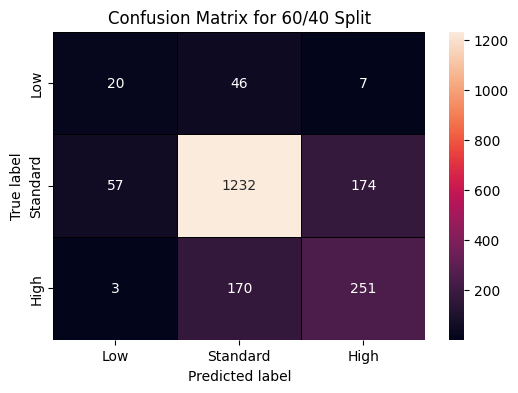


=== 80/20 Split ===
Classification Report:
              precision    recall  f1-score   support

         Low     0.3111    0.3784    0.3415        37
    Standard     0.8653    0.8523    0.8587       731
        High     0.6233    0.6321    0.6276       212

    accuracy                         0.7867       980
   macro avg     0.5999    0.6209    0.6093       980
weighted avg     0.7920    0.7867    0.7892       980

Confusion Matrix:
[[ 14  21   2]
 [ 29 623  79]
 [  2  76 134]]


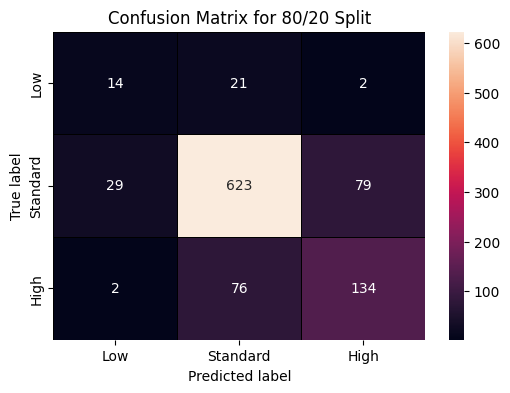


=== 90/10 Split ===
Classification Report:
              precision    recall  f1-score   support

         Low     0.3200    0.4444    0.3721        18
    Standard     0.8856    0.8251    0.8543       366
        High     0.6048    0.7075    0.6522       106

    accuracy                         0.7857       490
   macro avg     0.6035    0.6590    0.6262       490
weighted avg     0.8041    0.7857    0.7929       490

Confusion Matrix:
[[  8   8   2]
 [ 17 302  47]
 [  0  31  75]]


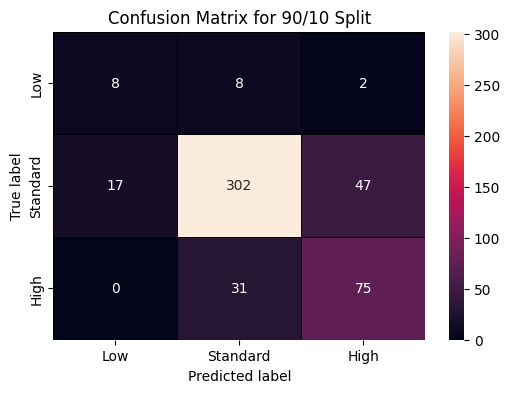

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
    
for name, subset in splits.items():
    X_train, y_train = subset["X_train"], subset["y_train"]
    X_test,  y_test  = subset["X_test"],  subset["y_test"]    

    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(f"\n=== {name} Split ===")
    print("Classification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=label_map.keys(),
        digits=4
    ))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', 
                xticklabels=label_map, yticklabels=label_map,
                linewidths=.5, linecolor='black') 
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {name} Split')
    plt.show()


# THE DEPTH AND ACCURACY OF A DECISION TREE


Decision Tree max depth = None


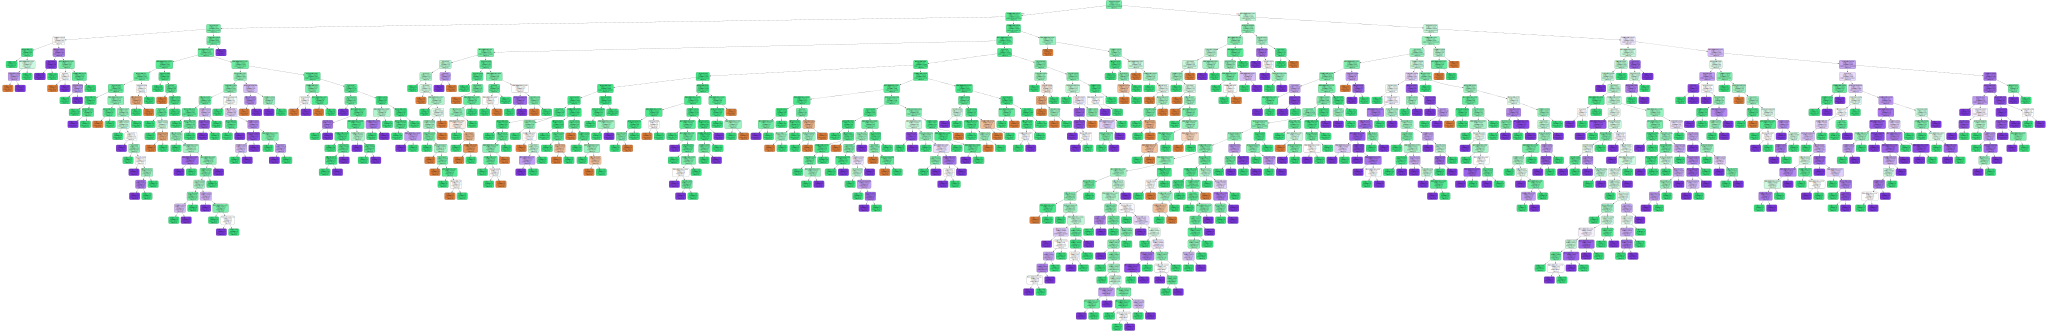


Decision Tree max depth = 2


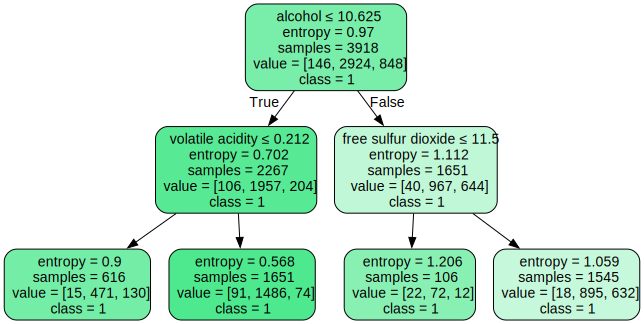


Decision Tree max depth = 3


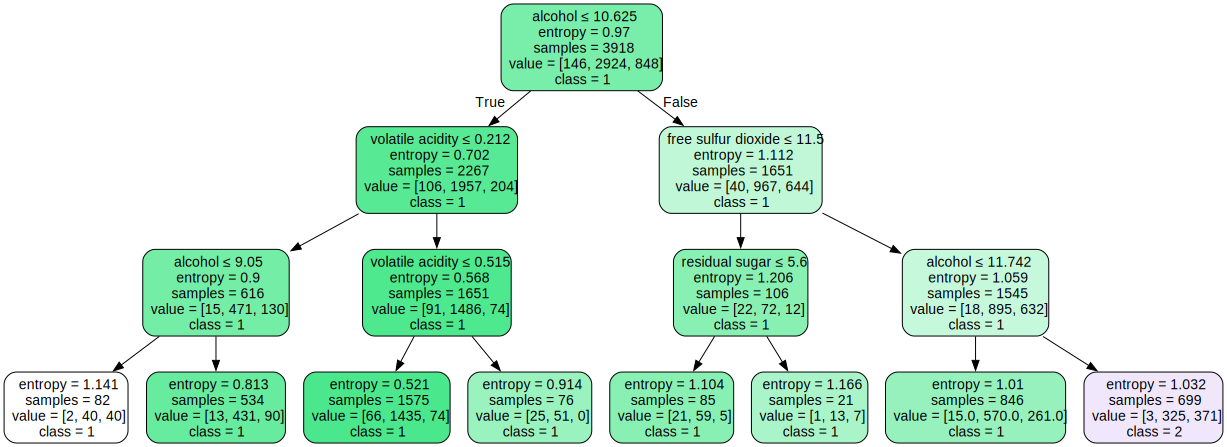


Decision Tree max depth = 4


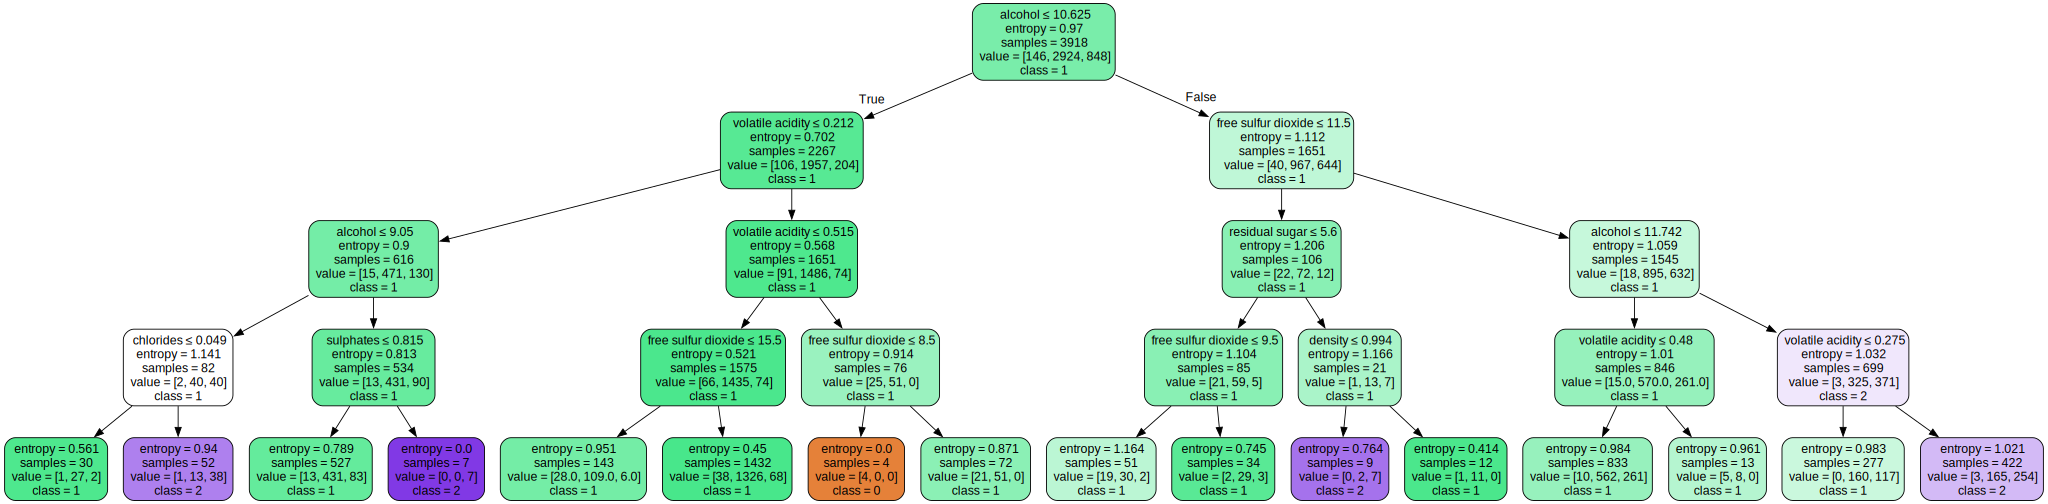


Decision Tree max depth = 5


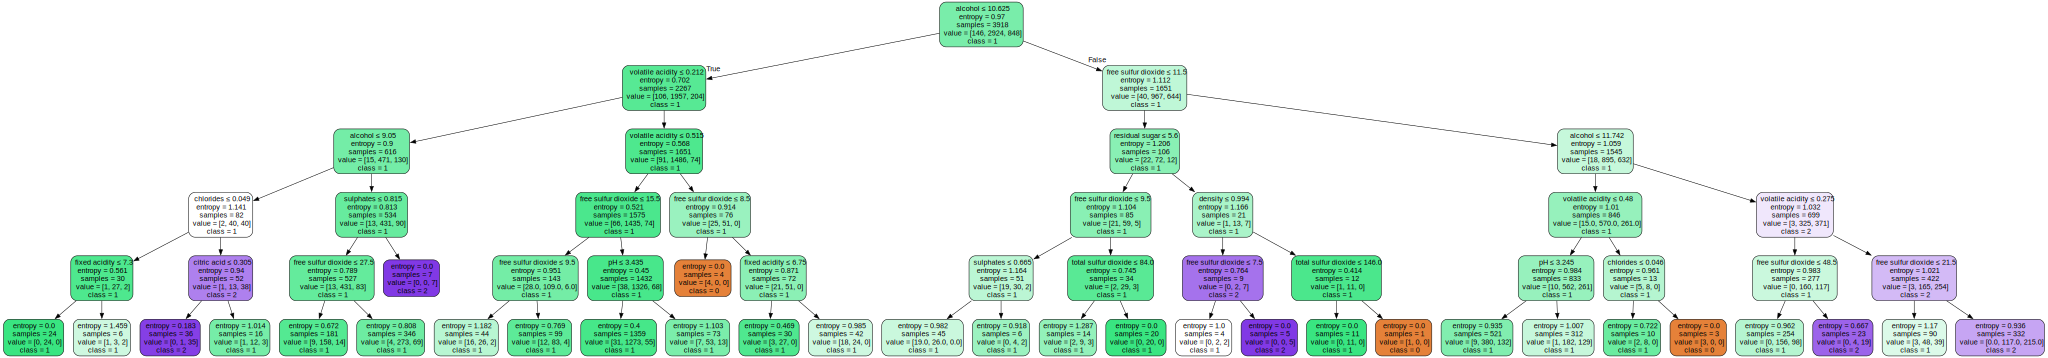


Decision Tree max depth = 6


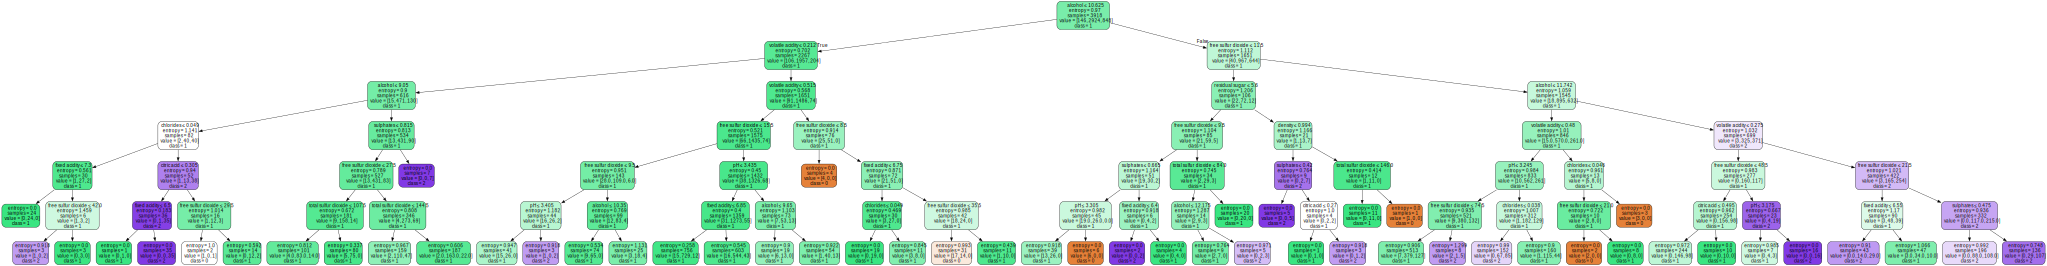


Decision Tree max depth = 7


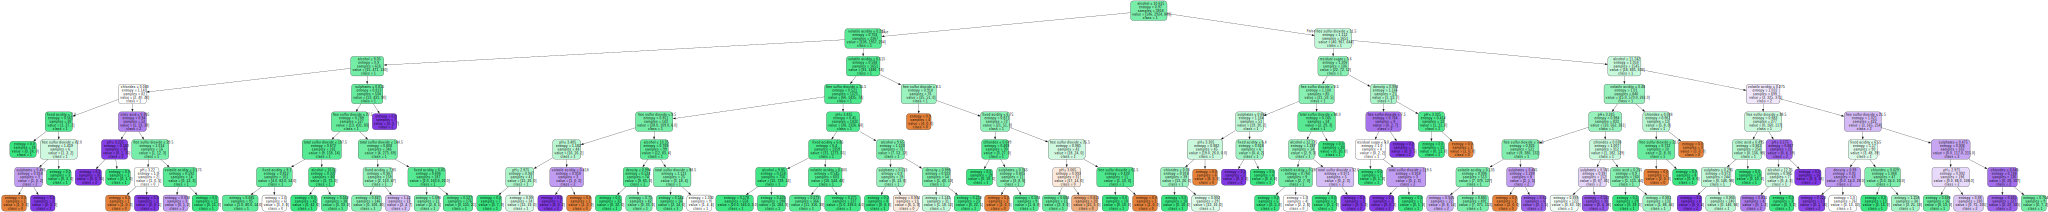


Accuracy by max_depth:
Max_depth	 Accuracy
None		 0.7867
2		 0.7459
3		 0.7582
4		 0.7571
5		 0.7786
6		 0.7653
7		 0.7745


In [ ]:
import matplotlib.pyplot as plt
import graphviz
import re
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 80/20 split
subset = splits["80/20"]
X_train, y_train = subset["X_train"], subset["y_train"]
X_test,  y_test  = subset["X_test"],  subset["y_test"]

max_depths = [None, 2, 3, 4, 5, 6, 7]
results = []

for depth in max_depths:
    # Train
    clf = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=depth,
        random_state=42
    )
    clf.fit(X_train, y_train)
    
    # Predict & compute accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "max_depth": "None" if depth is None else depth,
        "accuracy":  acc
    })
    
    # Export & display the tree
    dot = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        class_names=[str(c) for c in clf.classes_],
        filled=True,
        rounded=True,
        special_characters=True
    )
    print(f"\nDecision Tree max depth = {depth}")
    display(graphviz.Source(dot))

# Build a DataFrame of results
df_results = pd.DataFrame(results)

# Table
print("\nAccuracy by max_depth:")
print("Max_depth\t Accuracy")
for index, row in df_results.iterrows():  # Use `row` to access the data in each row
    print(f"{row['max_depth']}\t\t {row['accuracy']:.4f}")